<a href="https://colab.research.google.com/github/Ayat-Salem/week_4/blob/main/Copy_of_assignment_w4_c1_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Week 4, Assignment C1:

CAPM and Modern Portfolio Theory in Python

In this notebook, we will study Modern Portfolio Theory in Python.
Please complete the lines bellow where you see "# TODO".

In [1]:
#Objective 1.
#Use this cell to import Numpy (as np) and Pyplot (from Matplotlib as plt) packages.

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#Objective 2.
#Select a number of asset classes ( > 1 ) and a number of observations ( > 500 ).  Store your chosen values to the
#two new variables "no_of_asset_classes" and "no_of_observations", respectively.


no_of_asset_classes = 4
no_of_observations = 600

In [3]:
np.random.seed(123)
matrix_of_return_values = np.random.randn(no_of_asset_classes, no_of_observations)

#Objective 3.
#Select a number of test portfolios to generate ( > 1,000 < 20,000).  Store your chosen value to the new variable
#"no_of_portfolios".  

no_of_portfolios = 400

In [4]:
#Objective 4.
#Initialize four empty lists called "collection_of_random_asset_weights", "portfolio_means",
#"portfolio_standard_deviations", and "portfolio_sharpe_ratios", respectively.

collection_of_random_asset_weights = []
portfolio_means = []
portfolio_standard_deviations = []
portfolio_sharpe_ratios = []

In [5]:
#Objective 5.
#Write a function called "get_random_asset_weights" that takes as input (Input.I) any number of asset classes
#"no_of_asset_classes" and returns (Output.I) a Numpy vector (matrix) of weights (percentages) of length "no_of_asset_classes"
#whose sum is one (1).

def get_random_asset_weights(no_of_asset_classes):
    random_asset_weights = np.random.rand(no_of_asset_classes)
    random_asset_Sum= np.sum(random_asset_weights)
    random_asset_weights= random_asset_weights/random_asset_Sum
    
    return np.asmatrix(random_asset_weights) 

get_random_asset_weights(no_of_asset_classes)


matrix([[0.39156758, 0.26682271, 0.2701836 , 0.07142611]])

In [6]:
#Objective 6.
#Write a function called "get_portfolio_statistics" that takes as input (Input.I) a Numpy vector (matrix)
#"asset_weights" of weights (percentages) whose sum is one (1) and (Input.II) a Numpy matrix of return values
#"matrix_of_return_values" whose first axis length is the same as the length of the Numpy vector (matrix)
#"asset_weights" and returns (Output.I) the mean "portfolio_mean", (Output.II) the standard deviation
#"portfolio_standard_deviation", and (Output.III) the Sharpe ratio "portfolio_sharpe_ratio" of the portfolio of
#assets with asset weights "asset_weights" and asset return values belonging to "matrix_of_return_values".

def get_portfolio_statistics(asset_weights, matrix_of_return_values):
    asset_means = np.asmatrix(np.mean(matrix_of_return_values, axis = 1))
    asset_covariances = np.asmatrix(np.cov(matrix_of_return_values))
    portfolio_mean = asset_weights * asset_means.T
    #portfolio_mean = #todo second line if needed.
    portfolio_standard_deviation = np.sqrt(asset_weights * asset_covariances * asset_weights.T )
    #portfolio_standard_deviation = #todo second line if needed.
    portfolio_sharpe_ratio = portfolio_mean/portfolio_standard_deviation
    return portfolio_mean, portfolio_standard_deviation, portfolio_sharpe_ratio

In [7]:
#Objective 7.
#Using the functions constructed in Objectives 5 and 6, write a loop that, on each iteration, determines a
#Numpy vector (matrix) of weights (percentages) "random_asset_weights" of length "no_of_asset_classes" whose sum 
#is one (1) and then appends to each of the lists "collection_of_random_asset_weights", "portfolio_means",
#"portfolio_standard_deviations", and "portfolio_sharpe_ratios" the Numpy vector (matrix) of weights (percentages)
#"random_asset_weights"; and the mean "portfolio_mean", the standard deviation "portfolio_standard_deviation", and
#the Sharpe ratio "portfolio_sharpe_ratio" of the portfolio of assets with asset weights "asset_weights" and asset 
#return values belonging to "matrix_of_return_values", respectively.


while len(collection_of_random_asset_weights) < no_of_portfolios:
  random_asset_weights= get_random_asset_weights(no_of_asset_classes=no_of_asset_classes)
  collection_of_random_asset_weights.append(random_asset_weights)
  e_r, volatility, sr =  get_portfolio_statistics(
      asset_weights=random_asset_weights,
      matrix_of_return_values=matrix_of_return_values
  )
  
  portfolio_means.append(e_r.item())
  portfolio_standard_deviations.append(volatility.item())
  portfolio_sharpe_ratios.append(sr.item())




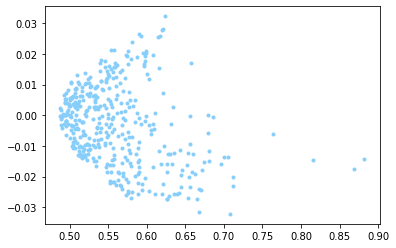

In [8]:
0#Objective 8.
#Make a scatterplot of the corresponding values (x,y) = (portfolio_standard_deviation, portfolio_mean) from the
#lists "portfolio_standard_deviations" and "portfolio_means", respectively.

plt.plot(portfolio_standard_deviations, portfolio_means, 'o', markersize = 3, color = 'lightskyblue') 
plt.show()

In [9]:
#Objective 9.
#Find the list index of the portfolio of highest Sharpe ratio.

index = np.argmax(portfolio_sharpe_ratios)

In [10]:
#Objective 10.
#Print the asset weights and Sharpe ratio of the portfolio of highest Sharpe ratio, using index above.

print(collection_of_random_asset_weights[index])
print(portfolio_sharpe_ratios[index])

[[0.1638233  0.10340103 0.11330648 0.61946919]]
0.051717737325785974


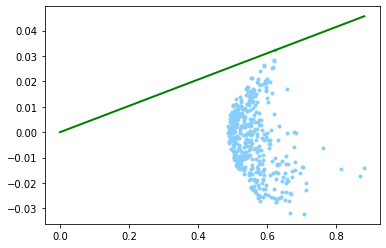

In [11]:
#Objective 11.
#Add the Capital Market Line to your scatterplot from Objective 8.

x = np.linspace(0, max(portfolio_standard_deviations), 10000)
y = portfolio_sharpe_ratios[index] * x
plt.plot(portfolio_standard_deviations, portfolio_means, 'o', markersize = 3, color = 'lightskyblue')
plt.plot(x, y, '-', linewidth = 2, color = 'green')
plt.show()

In [12]:
#Objective 12.
#All of the work in this notebook assumes a risk-free rate of zero (0.00).  How could this work be modified to
#accommodate a nonzero risk-free rate?  Explain.

we can chane the number of risk by chnage the number when its 0 risk-free rate becuse in each graph we have efficient and inefficient points, the inefficient point is placed down and we could find different portfolio with different higher return and doesn't have a higher risk with the same volatility, we have also the line which is the capital market when we choose the number of the risk-free rate return the line will be touching the part of the efficient portfolio the tangent portfolio and the line and curve will include a different combination of stocks and risk-free asset, the tangent portfolio is market portfolio and its the one with the highest sharp ratio, which is the excess portfolio returns the dived by the volatility which is  the total risk .

only two intersection point is different in this example it decides the risk-free rate be zero, if we change it for example to 4.0 then it will be no intersection points between the capital market and the inefficient portfolio. 
we can decide the number for the portfolio_sharpe_ratio retehr than zero and caculate it by using the formulla portfolio_sharpe_ratio = portfolio_mean/portfolio_standard_deviation
and portfolio_standard_deviation = portfolio_mean/portfolio_sharpe_ratio

